In [1]:
import numpy as np
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
path0p01 = 'idms_0p01/nuevoScan/'
path0p05 = 'idms_0p05/nuevoScan/'
path0p1 = 'idms_0p1/nuevoScan/'
path0p5 = 'idms_0p5/nuevoScan/'
path1 = 'idms_1/nuevoScan/'
path1i = 'idm/scan1/'
path1s = 'inelasticDarkMatter/nuevoScan/'

In [3]:
def calc_mchi2(mchi1, ma, gx, f):
    vphi = ma / (2*gx)
    return mchi1 + 2*f*vphi

def calc_lim_ms2(alphad, ma):
    return ma**2 / (4*np.sqrt(np.pi)* alphad)


def calc_values(df_dat):
    mx1 = df_dat.column('Mx1')
    yf = df_dat.column('yf')
    vphi = df_dat.column('MAp') / (2*df_dat.column('gX'))
    mx2 = mx1 + 2*yf*vphi
    df_dat['Mx2'] =  mx2
    df_dat['delta'] = df_dat.column('Mx2') - df_dat.column('Mx1')
    df_dat['alphad'] = (df_dat.column('gX')**2)/(4*np.pi)
    df_dat['alphaf'] = (df_dat.column('yf')**2)/(4*np.pi)
    #df_dat['ratio_ms2_map'] = df_dat.column('Ms2')**2 / calc_lim_ms2(df_dat.column('alphad'),df_dat.column('MAp'))
    df_dat['mass_relative'] = df_dat.column('delta') / df_dat.column('Mx1')
    return df_dat

def convertir_elementos(df_):
    # Crear una copia del DataFrame original
    df = df_.copy() 
        
    # Convertir y redondear las columnas numéricas
    df['Mchi1'] = df['Mchi1'] * 1e3 
    df['MAp'] = df['MAp'] * 1e3
    df['mphi'] = df['mphi'] * 1e3
    
    # Renombrar las columnas
    df = df.relabel('Mchi1', 'Mx1')
    df = df.relabel('Mchi2', 'Mx2')
    df = df.relabel('mphi', 'Ms2')
    df = df.relabel('ff', 'yf')
    df = df.relabel('angle', 'st')
    df = calc_values(df)
    return df 


def cargado_archivos(archivos):
    """
    Combina múltiples archivos CSV en una única tabla, manejando archivos vacíos o inexistentes.

    Args:
        archivos (list): Lista de rutas de archivos CSV.

    Returns:
        Table: Tabla combinada. Si no hay archivos válidos, retorna una tabla vacía.
    """
    datos = None  # Inicializamos como None para manejar el primer archivo válido

    for archivo in archivos:
        try:
            tabla_temp = Table.read_table(archivo)
            if tabla_temp.num_rows > 0:
                if datos is None:  # Primer archivo válido
                    datos = tabla_temp
                else:
                    datos.append(tabla_temp)  # Append a la tabla existente
        except FileNotFoundError:
            print(f"Error: {archivo} no existe.")
        except Exception as e:  # Otros errores (ej: formato incorrecto)
            print(f"Error al cargar {archivo}: {str(e)}")

    return Table() if datos is None else datos  # Retorna tabla vacía si no hay datos


#Los valores reportados por Planck
val_exp = 0.12 #Valor observado
error = 0.001 #Error reportado por Planck 
#Queremos que el valor sea calculado a 3 sigma, o sea, 3 veces el error reportado por Planck 
sigma = 3
val_por = sigma *  error 
val_min = round(val_exp - val_por,3)
val_max = round(val_exp + val_por,3)

def omega(df_):
    global val_min, val_max
    df = df_.copy()
    df['Densidad reliquia'] = np.round(df.column('Densidad reliquia'),3)
    return df.where('Densidad reliquia', are.between_or_equal_to(val_min,val_max))


In [4]:
def graficar_densidad_reliquia(df):
    plt.figure(figsize=(7, 5))  # Ancho mayor para 3 gráficos


    #plt.plot(df_5.column('Mx1'), df_5.column('Densidad reliquia'),'.',color='blue',alpha=0.5)
    plt.plot(df.column('Mx1'), df.column('Densidad reliquia'), 
             '.', color='blue', alpha=0.7, markersize=8)
    plt.axhline(y=val_min, color='red', linestyle='--', linewidth=1)
    plt.axhline(y=val_max, color='red', linestyle='--', linewidth=1)
    plt.ylabel(r'$\Omega h^2$', fontsize=14)
    plt.xlabel(r'$M_{\chi_{1}}$ (GeV)', fontsize=14)
    plt.ylim(0.115, 0.125)
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.xscale('log')
    plt.yscale('linear')
    
    
    plt.tight_layout()

def graficar_epsilon(df):
    plt.figure(figsize=(10,7))
    plt.plot(df.column('Mx1'), df.column('epsilon') ,'.',color='blue',alpha=0.5)
    plt.xscale('log')
    plt.yscale('log')
    plt.ylabel(r'$\epsilon$',size=20)
    plt.xlabel(r'$M_{\chi_{1}}$ (MeV)',size=20)
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    #plt.legend(fontsize=12, framealpha=0.9, loc='best')
    #plt.title(r'$\Delta \geq 2m_{e}$',size=20)
    plt.xlim(0.9,1e3+100)


def graficar_y(df):
    alpha = df.column('alphad')[0]
    ratio = round((df.column('Mx1') / df.column('MAp')).item(0),3)
    factor = alpha * ratio**4 
    plt.figure(figsize=(10,7))
    plt.plot(df.column('Mx1'), df.column('epsilon')**2 * factor ,'.',color='blue',alpha=0.5)
    plt.xscale('log')
    plt.yscale('log')
    plt.ylabel(r'$y = \alpha_{D}\epsilon^2(M_{\chi_{1}}/M_{A^\prime})^{4}$',size=20)
    plt.xlabel(r'$M_{\chi_{1}}$ (MeV)',size=20)
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    #plt.legend(fontsize=12, framealpha=0.9, loc='best')
    #plt.title(r'$\Delta \geq 2m_{e}$',size=20)
    plt.xlim(0.9,1e3+100)

In [5]:

def calc_values_idm(df_dat):
    mx1 = df_dat.column('Mx1')
    mx2 = mx1 + df_dat.column('deltamass')
    df_dat['Mx2'] =  mx2
    df_dat['delta'] = df_dat.column('Mx2') - df_dat.column('Mx1')
    df_dat['alphad'] = (df_dat.column('gX')**2)/(4*np.pi)
    df_dat['mass_relative'] = df_dat.column('delta') / df_dat.column('Mx1')
    return df_dat

def convertir_elementos_idm(df_):
    # Crear una copia del DataFrame original
    df = df_.copy() 
        
    # Convertir y redondear las columnas numéricas
    df['Mchi1'] = df['Mchi1'] * 1e3 
    df['MAp'] = df['MAp'] * 1e3
    #df['mphi'] = df['mphi'] * 1e3
    
    # Renombrar las columnas
    df = df.relabel('Mchi1', 'Mx1')
    df = df.relabel('Mchi2', 'Mx2')
    df = calc_values_idm(df)
    return df 

In [6]:
archivos1 = [f'{path0p01}analisis_random_0p011.csv',
            f'{path0p01}analisis_random_0p012.csv'
            f'{path0p01}analisis_random_0p013.csv',
            f'{path0p01}analisis_random_0p014.csv',
            f'{path0p01}analisis_random_0p015.csv',
            f'{path0p01}analisis_random_0p016.csv']

df_0p01 = cargado_archivos(archivos1)

df_0p01 = convertir_elementos(df_0p01)
df_0p01.show(3)
df_omega_0p01 = omega(df_0p01)
df_omega_0p01.show(3)

Error: idms_0p01/nuevoScan/analisis_random_0p012.csvidms_0p01/nuevoScan/analisis_random_0p013.csv no existe.


MAp,Ms2,Mx1,st,gX,epsilon,yf,Mx2,Densidad reliquia,loglikelihood,delta,alphad,alphaf,mass_relative
275.938,522.382,91.9794,0.0001,2.50663,0.000208501,9.08402e-05,91.9894,0.00918,6.13795,0.01,0.5,6.56669e-10,0.00010872
67.0093,47.724,22.3364,0.0001,2.50663,0.000507825,0.000374072,22.3464,0.000109,7.18693,0.01,0.5,1.11352e-08,0.000447699
3.56991,3.64507,1.18997,0.0001,2.50663,6.28804e-05,0.00702155,1.19997,8.47e-05,7.18984,0.01,0.5,3.92334e-06,0.00840358


MAp,Ms2,Mx1,st,gX,epsilon,yf,Mx2,Densidad reliquia,loglikelihood,delta,alphad,alphaf,mass_relative
26.8125,1881.93,8.93749,0.0001,2.50663,4.89756e-06,0.000934874,8.94749,0.123,0.00418354,0.01,0.5,6.95499e-08,0.00111888
1418.56,48.1161,472.853,0.0001,2.50663,0.000228692,1.76702e-05,472.863,0.123,0.00418354,0.01,0.5,2.4847e-11,2.11482e-05
1994.98,13.3106,664.992,0.0001,2.50663,0.000326132,1.25647e-05,665.002,0.118,0.00186982,0.01,0.5,1.2563e-11,1.50378e-05


In [7]:
archivos1 = [f'{path0p05}analisis_random_0p051.csv',
            f'{path0p05}analisis_random_0p052.csv']

df_0p05 = cargado_archivos(archivos1)

df_0p05 = convertir_elementos(df_0p05)
df_0p05.show(3)
df_omega_0p05 = omega(df_0p05)
df_omega_0p05.show(3)

MAp,Ms2,Mx1,st,gX,epsilon,yf,Mx2,Densidad reliquia,loglikelihood,delta,alphad,alphaf,mass_relative
149.991,665.936,49.997,0.0001,2.50663,0.000167509,0.000835593,50.047,0.0043,6.69263,0.05,0.5,5.55622e-08,0.00100006
29.3395,4.33736,9.77982,0.0001,2.50663,6.62494e-06,0.00427177,9.82982,0.000351,7.15794,0.05,0.5,1.45213e-06,0.00511257
4.0416,5837.3,1.3472,0.0001,2.50663,1.77671e-06,0.0310103,1.3972,0.102,0.153989,0.05,0.5,7.65248e-05,0.037114


MAp,Ms2,Mx1,st,gX,epsilon,yf,Mx2,Densidad reliquia,loglikelihood,delta,alphad,alphaf,mass_relative
4.05266,27.7121,1.35089,0.0001,2.50663,1.60333e-06,0.0309257,1.40089,0.123,0.00418354,0.05,0.5,7.61079e-05,0.0370127
164.587,1793.22,54.8625,0.0001,2.50663,3.1184e-05,0.000761488,54.9125,0.123,0.00418354,0.05,0.5,4.61441e-08,0.000911369
2192.5,558.161,730.834,0.0001,2.50663,0.000355562,5.71637e-05,730.884,0.119,0.000466938,0.05,0.5,2.60034e-10,6.8415e-05


In [8]:
archivos1 = [f'{path0p5}analisis_random_0p51.csv',
            f'{path0p5}analisis_random_0p52.csv',
            f'{path0p5}analisis_random_0p53.csv',
            f'{path0p5}analisis_random_0p54.csv',
            f'{path0p5}analisis_random_0p55.csv',
            f'{path0p5}analisis_random_0p56.csv']

df_0p5 = cargado_archivos(archivos1)

df_0p5 = convertir_elementos(df_0p5)
df_0p5.show(3)
df_omega_0p5 = omega(df_0p5)
df_omega_0p5.show(3)

MAp,Ms2,Mx1,st,gX,epsilon,yf,Mx2,Densidad reliquia,loglikelihood,delta,alphad,alphaf,mass_relative
194.284,25.2372,64.7613,0.0001,2.50663,0.000114841,0.00645094,65.2613,0.00613,6.48197,0.5,0.5,3.31159e-06,0.00772066
88.5707,2.10416,29.5236,0.0001,2.50663,5.06048e-06,0.0141504,30.0236,0.0149,5.51688,0.5,0.5,1.59342e-05,0.0169356
7.30278,413.149,2.43426,0.0001,2.50663,2.45759e-06,0.171621,2.93426,0.4,21.7778,0.5,0.5,0.00234387,0.205401


MAp,Ms2,Mx1,st,gX,epsilon,yf,Mx2,Densidad reliquia,loglikelihood,delta,alphad,alphaf,mass_relative
1111.02,59.7825,370.338,0.0001,2.50663,0.000184584,0.00112808,370.838,0.119,0.000466938,0.5,0.5,1.01268e-07,0.00135012
6.7418,3495.99,2.24727,0.0001,2.50663,6.86973e-06,0.185902,2.74727,0.12,0,0.5,0.5,0.00275016,0.222492
530.43,16.8562,176.81,0.0001,2.50663,8.79443e-05,0.00236283,177.31,0.119,0.000466938,0.5,0.5,4.44276e-07,0.00282789


In [9]:
archivos1 = [f'{path1}analisis_random_11.csv',
            f'{path1}analisis_random_12.csv',
            f'{path1}analisis_random_13.csv',
            f'{path1}analisis_random_14.csv',
            f'{path1}analisis_random_15.csv',
            f'{path1}analisis_random_16.csv']

df_1 = cargado_archivos(archivos1)

df_1 = convertir_elementos(df_1)
df_1.show(3)
df_omega_1 = omega(df_1)
df_omega_1.show(3)

MAp,Ms2,Mx1,st,gX,epsilon,yf,Mx2,Densidad reliquia,loglikelihood,delta,alphad,alphaf,mass_relative
24.367,16.871,8.12233,0.0001,2.50663,0.000214623,0.10287,9.12233,0.000653,7.12184,1,0.5,0.000842105,0.123117
9.89239,964.031,3.29746,0.0001,2.50663,2.35995e-05,0.253389,4.29746,0.0558,2.02923,1,0.5,0.00510937,0.303263
456.657,7596.99,152.219,0.0001,2.50663,0.000493219,0.00548908,153.219,0.00365,6.76821,1,0.5,2.39767e-06,0.00656948


MAp,Ms2,Mx1,st,gX,epsilon,yf,Mx2,Densidad reliquia,loglikelihood,delta,alphad,alphaf,mass_relative
8.93097,96.1751,2.97699,0.0001,2.50663,1.53558e-05,0.280667,3.97699,0.12,0,1,0.5,0.00626863,0.33591
977.764,232.545,325.921,0.0001,2.50663,6.32409e-05,0.00256363,326.921,0.118,0.00186982,1,0.5,5.23001e-07,0.00306823
13.8388,163.305,4.61294,0.0001,2.50663,9.85817e-06,0.18113,5.61294,0.121,0.000465894,1,0.5,0.00261079,0.216781


In [10]:
archivos1 = [f'{path1s}analisis_delta0p01MeV_new_1.csv',
            f'{path1s}analisis_delta0p01MeV_new_2.csv',
            f'{path1s}analisis_delta0p01MeV_new_3.csv',
            f'{path1s}analisis_delta0p01MeV_new_4.csv']

df_0p01_de = cargado_archivos(archivos1)

df_0p01_de = convertir_elementos(df_0p01_de)
df_0p01_de = calc_values(df_0p01_de)
df_0p01_de.show(3)
df_omega_0p01_de = omega(df_0p01_de)
df_omega_0p01_de.show(3)

MAp,Ms2,Mx1,st,gX,epsilon,yf,Mx2,Densidad reliquia,loglikelihood,delta,alphad,alphaf,mass_relative
3.25194,785.832,1.08398,0.0001,2.50663,9.87319e-05,0.00770809,1.09398,3.07e-05,7.19632,0.01,0.5,4.72807e-06,0.00922525
579.563,1.97509,193.188,0.0001,2.50663,0.000421475,4.32503e-05,193.198,0.00703,6.37953,0.01,0.5,1.48857e-10,5.17632e-05
230.367,2403.16,76.7889,0.0001,2.50663,1.74994e-06,0.00010881,76.7989,47.6,99.4877,0.01,0.5,9.42174e-10,0.000130227


MAp,Ms2,Mx1,st,gX,epsilon,yf,Mx2,Densidad reliquia,loglikelihood,delta,alphad,alphaf,mass_relative
58.4841,9042.65,19.4947,0.0001,2.50663,1.09854e-05,0.0004286,19.5047,0.118,0.00186982,0.01,0.5,1.46182e-08,0.00051296
8.34648,11.1429,2.78216,0.0001,2.50663,1.96282e-06,0.00300321,2.79216,0.119,0.000466938,0.01,0.5,7.17733e-07,0.00359433
855.106,1.32962,285.035,0.0001,2.50663,0.000140741,2.93136e-05,285.045,0.118,0.00186982,0.01,0.5,6.83801e-11,3.50834e-05


In [11]:
archivos1 = [f'{path1s}analisis_delta0p05MeV_new_1.csv',
            f'{path1s}analisis_delta0p05MeV_new_2.csv',]

df_0p05_de = cargado_archivos(archivos1)

df_0p05_de = convertir_elementos(df_0p05_de)
df_0p05_de = calc_values(df_0p05_de)
df_omega_0p05_de = omega(df_0p05_de)
df_0p05_de.show(3)
df_omega_0p05_de.show(3)

MAp,Ms2,Mx1,st,gX,epsilon,yf,Mx2,Densidad reliquia,loglikelihood,delta,alphad,alphaf,mass_relative
25.8226,7840.17,8.60752,0.0001,2.50663,6.2305e-06,0.00485356,8.65752,0.0753,0.971502,0.05,0.5,1.87461e-06,0.00580887
297.993,150.902,99.3309,0.0001,2.50663,1.29262e-06,0.000420585,99.3809,122,99.802,0.05,0.5,1.40766e-08,0.000503368
2863.16,603.438,954.385,0.0001,2.50663,0.000155886,4.37739e-05,954.435,0.903,60.3785,0.05,0.5,1.52483e-10,5.23898e-05


MAp,Ms2,Mx1,st,gX,epsilon,yf,Mx2,Densidad reliquia,loglikelihood,delta,alphad,alphaf,mass_relative
579.062,15.3436,193.021,0.0001,2.50663,9.57171e-05,0.000216439,193.071,0.117,0.00421173,0.05,0.5,3.72787e-09,0.00025904
108.259,3425.33,36.0865,0.0001,2.50663,2.04122e-05,0.0011577,36.1365,0.121,0.000465894,0.05,0.5,1.06654e-07,0.00138556
54.2721,33.6254,18.0907,0.0001,2.50663,1.01804e-05,0.00230931,18.1407,0.12,0,0.05,0.5,4.24381e-07,0.00276385


In [12]:
archivos1 = [f'{path1s}analisis_delta0p5MeV_alpha0p5_1.csv',
            f'{path1s}analisis_delta0p5MeV_alpha0p5_2.csv',]

df_0p5_de = cargado_archivos(archivos1)

df_0p5_de = convertir_elementos(df_0p5_de)
df_0p5_de = calc_values(df_0p5_de)
df_omega_0p5_de = omega(df_0p5_de)
df_0p5_de.show(3)
df_omega_0p5_de.show(3)

MAp,Ms2,Mx1,st,gX,epsilon,yf,Mx2,Densidad reliquia,loglikelihood,delta,alphad,alphaf,mass_relative
17.9687,559.447,5.98958,0.0001,2.50663,3.27891e-06,0.0697497,6.48958,0.252,6.61242,0.5,0.5,0.000387146,0.0834783
10.0943,328.294,3.36477,0.0001,2.50663,4.05859e-05,0.124161,3.86477,0.00395,6.73328,0.5,0.5,0.00122675,0.148599
19.8137,4.01265,6.60458,0.0001,2.50663,3.62746e-05,0.0632548,7.10458,1.36e-07,7.19998,0.5,0.5,0.000318403,0.0757051


MAp,Ms2,Mx1,st,gX,epsilon,yf,Mx2,Densidad reliquia,loglikelihood,delta,alphad,alphaf,mass_relative
2092.44,4.85226,697.481,0.0001,2.50663,0.00034473,0.000598972,697.981,0.117,0.00421173,0.5,0.5,2.85498e-08,0.000716865
1358,1.40456,452.667,0.0001,2.50663,0.000223792,0.000922911,453.167,0.12,0,0.5,0.5,6.77812e-08,0.00110456
832.289,33.4954,277.43,0.0001,2.50663,0.000137058,0.00150586,277.93,0.121,0.000465894,0.5,0.5,1.80452e-07,0.00180226


In [13]:
archivos1 = [f'{path1s}analisis_delta1MeV_alpha0p5_1.csv',
            f'{path1s}analisis_delta1MeV_alpha0p5_2.csv',]

df_1_de = cargado_archivos(archivos1)

df_1_de = convertir_elementos(df_1_de)
df_1_de = calc_values(df_1_de)
df_omega_1_de = omega(df_1_de)
df_1_de.show(3)
df_omega_1_de.show(3)

MAp,Ms2,Mx1,st,gX,epsilon,yf,Mx2,Densidad reliquia,loglikelihood,delta,alphad,alphaf,mass_relative
1312.82,2.34464,437.607,0.0001,2.50663,1.81843e-06,0.00190935,438.607,196,99.8771,1,0.5,2.90108e-07,0.00228516
328.464,4097.11,109.488,0.0001,2.50663,1.2237e-06,0.00763137,110.488,148,99.837,1,0.5,4.63442e-06,0.00913343
53.8703,1427.74,17.9568,0.0001,2.50663,2.96241e-06,0.0465308,18.9568,1.74,81.3112,1,0.5,0.000172294,0.0556893


MAp,Ms2,Mx1,st,gX,epsilon,yf,Mx2,Densidad reliquia,loglikelihood,delta,alphad,alphaf,mass_relative
5.85431,275.67,1.95144,0.0001,2.50663,0.00066044,0.428168,2.95144,0.117,0.00421173,1,0.5,0.0145888,0.512443
60.035,817.28,20.0117,0.0001,2.50663,1.45318e-05,0.0417528,21.0117,0.122,0.00186147,1,0.5,0.000138727,0.0499708
312.683,10.7951,104.228,0.0001,2.50663,5.72425e-05,0.00801652,105.228,0.117,0.00421173,1,0.5,5.11402e-06,0.00959439


In [14]:
archivos1 = [f'{path1i}analisis_delta0p01MeV_new_1.csv',
            f'{path1i}analisis_delta0p01MeV_new_2.csv']

df_0p01_idm = cargado_archivos(archivos1)

df_0p01_idm = convertir_elementos_idm(df_0p01_idm)
df_omega_0p01_idm = omega(df_0p01_idm)
df_0p01_idm.show(3)
df_omega_0p01_idm.show(3)

MAp,Mx1,gX,epsilon,deltamass,Mx2,Densidad reliquia,loglikelihood,delta,alphad,mass_relative
1023.14,341.048,2.50663,4.93195e-05,1e-05,341.048,1.19,70.8434,1e-05,0.5,2.93214e-08
523.292,174.431,2.50663,1.5776e-06,1e-05,174.431,191,99.8738,1e-05,0.5,5.73293e-08
264.416,88.1385,2.50663,2.58975e-06,1e-05,88.1386,30.3,99.1879,1e-05,0.5,1.13458e-07


MAp,Mx1,gX,epsilon,deltamass,Mx2,Densidad reliquia,loglikelihood,delta,alphad,mass_relative
35.8561,11.952,2.50663,6.65399e-06,1e-05,11.952,0.119,0.000466938,1e-05,0.5,8.36678e-07
1678.2,559.4,2.50663,0.000272955,1e-05,559.4,0.12,0,1e-05,0.5,1.78763e-08
1678.2,559.4,2.50663,0.000272955,1e-05,559.4,0.12,0,1e-05,0.5,1.78763e-08


In [15]:
archivos1 = [f'{path1i}analisis_delta0p05MeV_new_1.csv',
            f'{path1i}analisis_delta0p05MeV_new_2.csv']

df_0p05_idm = cargado_archivos(archivos1)

df_0p05_idm = convertir_elementos_idm(df_0p05_idm)
df_omega_0p05_idm = omega(df_0p05_idm)
df_0p05_idm.show(3)
df_omega_0p05_idm.show(3)

MAp,Mx1,gX,epsilon,deltamass,Mx2,Densidad reliquia,loglikelihood,delta,alphad,mass_relative
1390.38,463.461,2.50663,0.000319672,5e-05,463.461,0.063,1.59289,5e-05,0.5,1.07884e-07
1201.65,400.551,2.50663,0.000905345,5e-05,400.551,0.00666,6.42155,5e-05,0.5,1.24828e-07
2141.79,713.931,2.50663,0.00036742,5e-05,713.931,0.107,0.0799247,5e-05,0.5,7.00348e-08


MAp,Mx1,gX,epsilon,deltamass,Mx2,Densidad reliquia,loglikelihood,delta,alphad,mass_relative
342.629,114.21,2.50663,5.7887e-05,5e-05,114.21,0.123,0.00418354,5e-05,0.5,4.37792e-07
342.629,114.21,2.50663,5.7887e-05,5e-05,114.21,0.123,0.00418354,5e-05,0.5,4.37792e-07
2314.88,771.628,2.50663,0.00036742,5e-05,771.628,0.123,0.00418354,5e-05,0.5,6.47981e-08


In [16]:
archivos1 = [f'{path1i}analisis_delta0p5_alpha0p5MeV_new_1.csv',
            f'{path1i}analisis_delta0p5_alpha0p5MeV_new_2.csv']

df_0p5_idm = cargado_archivos(archivos1)

df_0p5_idm = convertir_elementos_idm(df_0p5_idm)
df_omega_0p5_idm = omega(df_0p5_idm)
df_0p5_idm.show(3)
df_omega_0p5_idm.show(3)

MAp,Mx1,gX,epsilon,deltamass,Mx2,Densidad reliquia,loglikelihood,delta,alphad,mass_relative
7.47754,2.49251,2.50663,8.62976e-05,0.0005,2.49301,0.00203,6.95832,0.0005,0.5,0.000200601
12.2401,4.08002,2.50663,1.90916e-06,0.0005,4.08052,0.504,32.4782,0.0005,0.5,0.000122548
84.9008,28.3003,2.50663,6.79363e-05,0.0005,28.3008,0.00959,6.09238,0.0005,0.5,1.76677e-05


MAp,Mx1,gX,epsilon,deltamass,Mx2,Densidad reliquia,loglikelihood,delta,alphad,mass_relative
214.758,71.5859,2.50663,4.2615e-05,0.0005,71.5864,0.121,0.000465894,0.0005,0.5,6.98461e-06
1303.24,434.413,2.50663,0.000214928,0.0005,434.414,0.12,0,0.0005,0.5,1.15098e-06
36.7107,12.2369,2.50663,8.33161e-06,0.0005,12.2374,0.118,0.00186982,0.0005,0.5,4.086e-05


In [17]:
#analisis_delta1_alpha0p5MeV_new_1.csv
archivos1 = [f'{path1i}analisis_delta1_alpha0p5MeV_new_1.csv',
            f'{path1i}analisis_delta1_alpha0p5MeV_new_2.csv']



df_1_idm = cargado_archivos(archivos1)

df_1_idm = convertir_elementos_idm(df_1_idm)
df_omega_1_idm = omega(df_1_idm)
df_1_idm.show(3)
df_omega_1_idm.show(3)

MAp,Mx1,gX,epsilon,deltamass,Mx2,Densidad reliquia,loglikelihood,delta,alphad,mass_relative
4.69861,1.5662,2.50663,0.00025167,0.001,1.5672,1e+10,100,0.001,0.5,0.000638486
2595.44,865.148,2.50663,1.02691e-05,0.001,865.149,115,99.7899,0.001,0.5,1.15587e-06
15.9665,5.32217,2.50663,0.000620714,0.001,5.32317,0.000185,7.17782,0.001,0.5,0.000187893


MAp,Mx1,gX,epsilon,deltamass,Mx2,Densidad reliquia,loglikelihood,delta,alphad,mass_relative
1727.18,575.727,2.50663,0.00028862,0.001,575.728,0.117,0.00421173,0.001,0.5,1.73694e-06
1727.18,575.727,2.50663,0.00028862,0.001,575.728,0.117,0.00421173,0.001,0.5,1.73694e-06
26.7914,8.93048,2.50663,9.15563e-06,0.001,8.93148,0.123,0.00418354,0.001,0.5,0.000111976


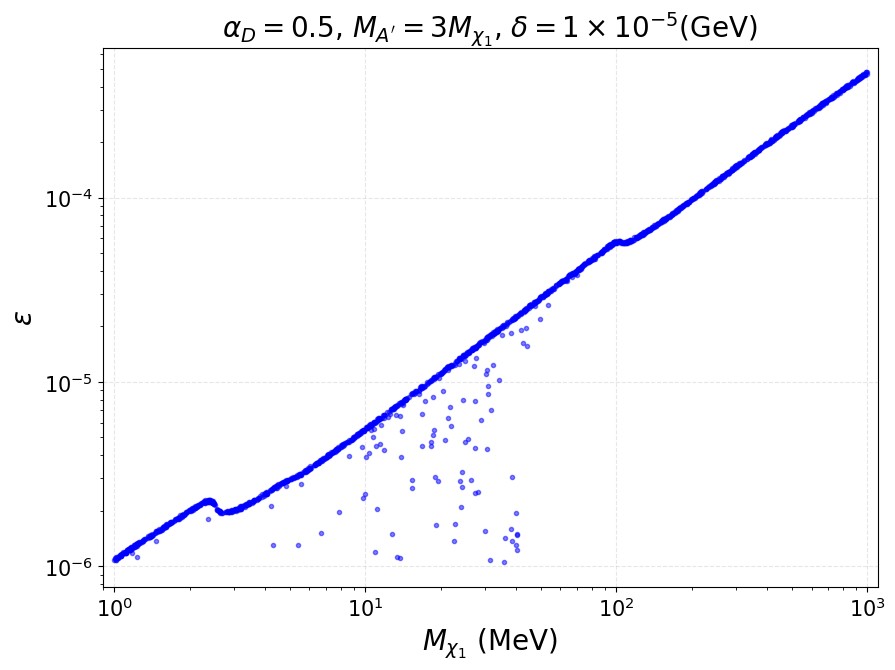

In [18]:
graficar_epsilon(df_omega_0p01)
plt.title(r'$\alpha_{D} = 0.5\text{, } M_{A^{\prime}} = 3 M_{\chi_{1}}\text{, } \delta = 1\times 10^{-5}$(GeV)',size=20)
plt.show()

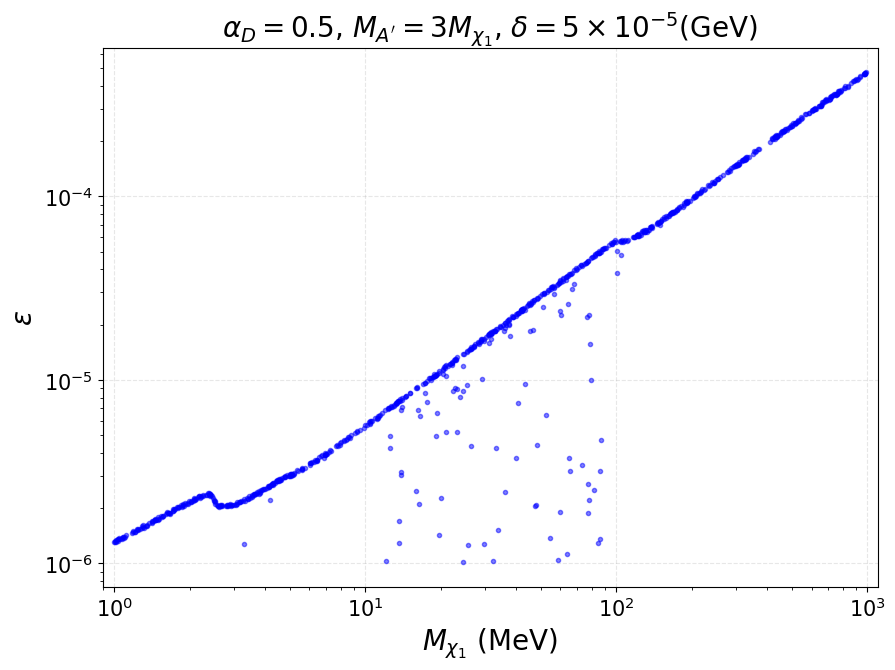

In [19]:
graficar_epsilon(df_omega_0p05)
plt.title(r'$\alpha_{D} = 0.5\text{, } M_{A^{\prime}} = 3 M_{\chi_{1}}\text{, } \delta = 5\times 10^{-5}$(GeV)',size=20)
plt.show()

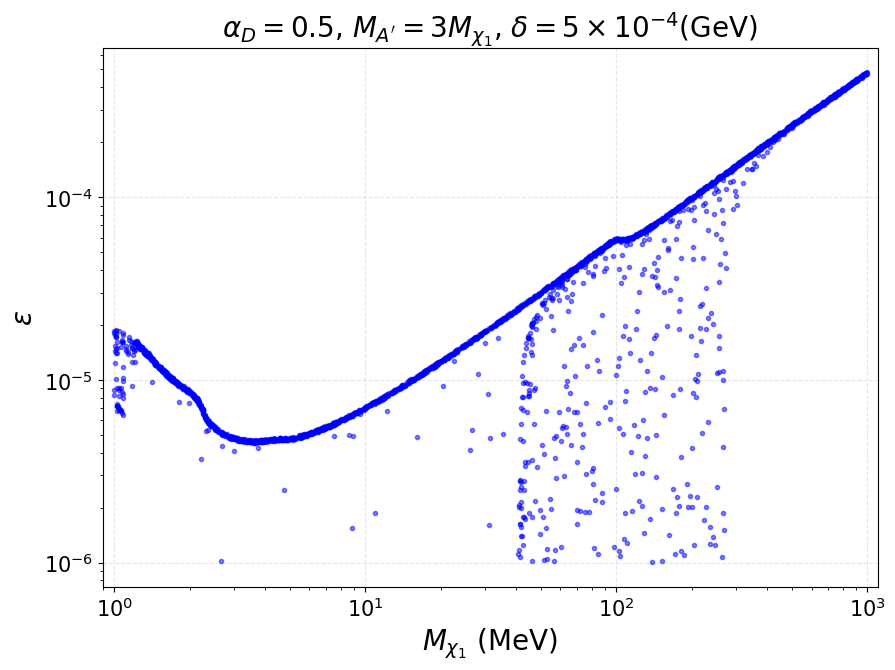

In [20]:
graficar_epsilon(df_omega_0p5)
plt.title(r'$\alpha_{D} = 0.5\text{, } M_{A^{\prime}} = 3 M_{\chi_{1}}\text{, } \delta = 5\times 10^{-4}$(GeV)',size=20)
plt.show()

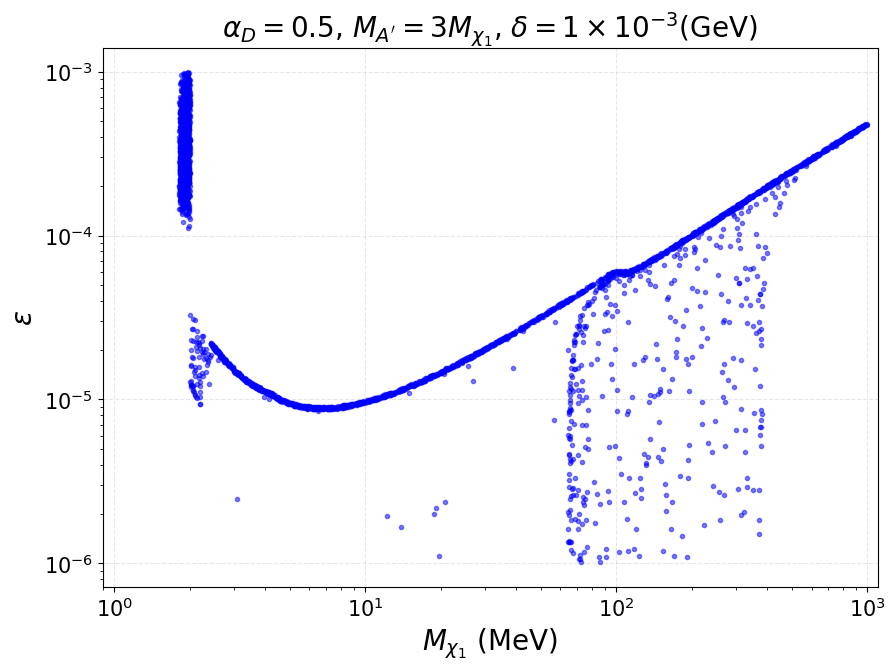

In [21]:
graficar_epsilon(df_omega_1)
plt.title(r'$\alpha_{D} = 0.5\text{, } M_{A^{\prime}} = 3 M_{\chi_{1}}\text{, } \delta = 1\times 10^{-3}$(GeV)',size=20)
plt.show()

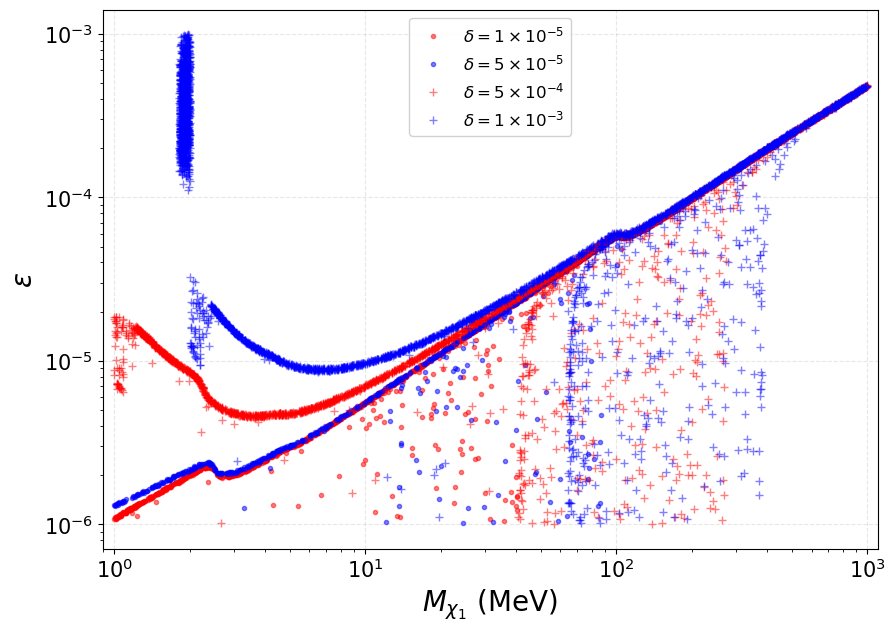

In [22]:
plt.figure(figsize=(10,7))
plt.plot(df_omega_0p01.column('Mx1'), df_omega_0p01.column('epsilon') ,'.',color='red',alpha=0.5,label=r'$\delta = 1\times 10^{-5}$')
plt.plot(df_omega_0p05.column('Mx1'), df_omega_0p05.column('epsilon') ,'.',color='blue',alpha=0.5,label=r'$\delta = 5\times 10^{-5}$')
plt.plot(df_omega_0p5.column('Mx1'), df_omega_0p5.column('epsilon') ,'+',color='red',alpha=0.5,label=r'$\delta = 5\times 10^{-4}$')
plt.plot(df_omega_1.column('Mx1'), df_omega_1.column('epsilon') ,'+',color='blue',alpha=0.5,label=r'$\delta = 1\times 10^{-3}$')
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$\epsilon$',size=20)
plt.xlabel(r'$M_{\chi_{1}}$ (MeV)',size=20)
plt.grid(True, linestyle='--', alpha=0.3)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=12, framealpha=0.9, loc='best')
#plt.title(r'$\Delta \geq 2m_{e}$',size=20)
plt.xlim(0.9,1e3+100)
plt.show()

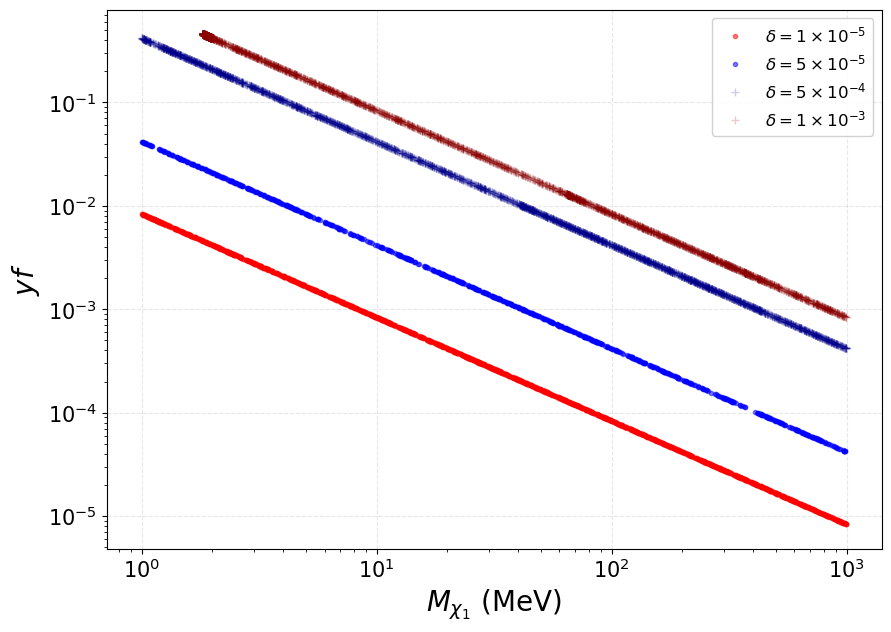

In [23]:
plt.figure(figsize=(10,7))
plt.plot(df_omega_0p01.column('Mx1'), df_omega_0p01.column('yf') ,'.',color='red',alpha=0.5,label=r'$\delta = 1\times 10^{-5}$')
plt.plot(df_omega_0p05.column('Mx1'), df_omega_0p05.column('yf') ,'.',color='blue',alpha=0.5,label=r'$\delta = 5\times 10^{-5}$')
plt.plot(df_omega_0p5.column('Mx1'), df_omega_0p5.column('yf') ,'+',color='darkblue',alpha=0.2,label=r'$\delta = 5\times 10^{-4}$')
plt.plot(df_omega_1.column('Mx1'), df_omega_1.column('yf') ,'+',color='darkred',alpha=0.2,label=r'$\delta = 1\times 10^{-3}$')
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$yf$',size=20)
plt.xlabel(r'$M_{\chi_{1}}$ (MeV)',size=20)
plt.grid(True, linestyle='--', alpha=0.3)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=12, framealpha=0.9, loc='best')
#plt.title(r'$\Delta \geq 2m_{e}$',size=20)
#plt.xlim(0.9,1e3+100)
plt.show()

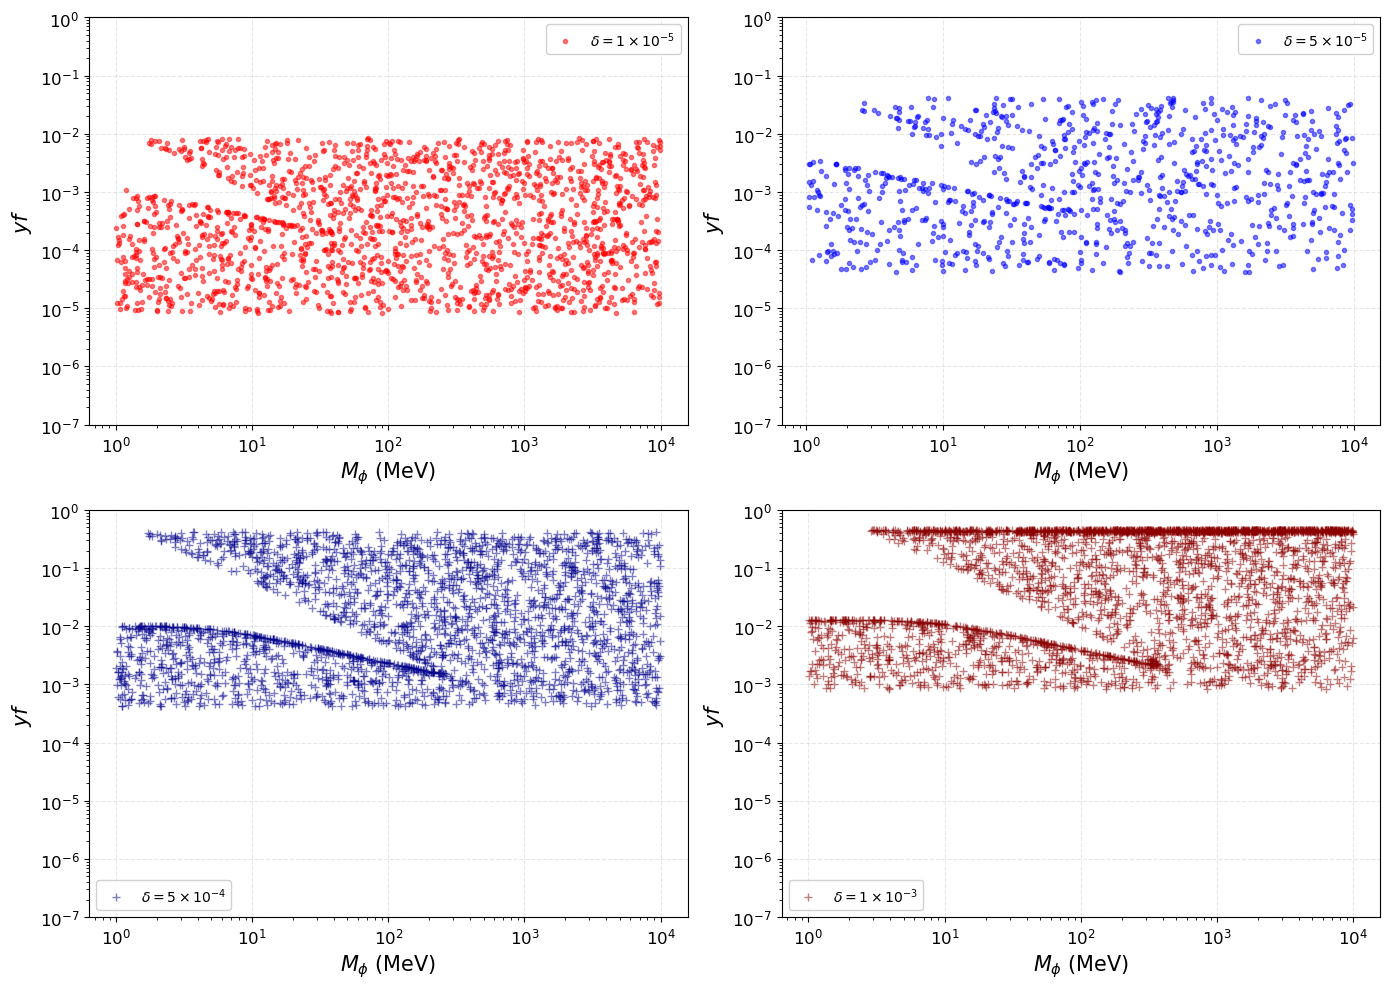

In [24]:
# Crear la figura con 4 subplots (2x2)
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Subplot 1: δ = 1×10⁻⁵
axs[0, 0].plot(df_omega_0p01.column('Ms2'), df_omega_0p01.column('yf'), '.', 
               color='red', alpha=0.5, label=r'$\delta = 1\times 10^{-5}$')
axs[0, 0].set_xscale('log')
axs[0, 0].set_yscale('log')
axs[0, 0].set_ylabel(r'$yf$', size=15)
axs[0, 0].set_xlabel(r'$M_{\phi}$ (MeV)', size=15)
axs[0, 0].grid(True, linestyle='--', alpha=0.3)
axs[0, 0].tick_params(axis='both', which='major', labelsize=12)
axs[0, 0].legend(fontsize=10, framealpha=0.9, loc='best')
axs[0, 0].set_ylim(1e-7, 1)  # Límite corregido para este subplot

# Subplot 2: δ = 5×10⁻⁵
axs[0, 1].plot(df_omega_0p05.column('Ms2'), df_omega_0p05.column('yf'), '.', 
               color='blue', alpha=0.5, label=r'$\delta = 5\times 10^{-5}$')
axs[0, 1].set_xscale('log')
axs[0, 1].set_yscale('log')
axs[0, 1].set_ylabel(r'$yf$', size=15)
axs[0, 1].set_xlabel(r'$M_{\phi}$ (MeV)', size=15)
axs[0, 1].grid(True, linestyle='--', alpha=0.3)
axs[0, 1].tick_params(axis='both', which='major', labelsize=12)
axs[0, 1].legend(fontsize=10, framealpha=0.9, loc='best')
axs[0, 1].set_ylim(1e-7, 1)  # Límite corregido para este subplot

# Subplot 3: δ = 5×10⁻⁴
axs[1, 0].plot(df_omega_0p5.column('Ms2'), df_omega_0p5.column('yf'), '+', 
               color='darkblue', alpha=0.5, label=r'$\delta = 5\times 10^{-4}$')
axs[1, 0].set_xscale('log')
axs[1, 0].set_yscale('log')
axs[1, 0].set_ylabel(r'$yf$', size=15)
axs[1, 0].set_xlabel(r'$M_{\phi}$ (MeV)', size=15)
axs[1, 0].grid(True, linestyle='--', alpha=0.3)
axs[1, 0].tick_params(axis='both', which='major', labelsize=12)
axs[1, 0].legend(fontsize=10, framealpha=0.9, loc='best')
axs[1, 0].set_ylim(1e-7, 1) # Límite corregido para este subplot

# Subplot 4: δ = 1×10⁻³
axs[1, 1].plot(df_omega_1.column('Ms2'), df_omega_1.column('yf'), '+', 
              color='darkred', alpha=0.5, label=r'$\delta = 1\times 10^{-3}$')
axs[1, 1].set_xscale('log')
axs[1, 1].set_yscale('log')
axs[1, 1].set_ylabel(r'$yf$', size=15)
axs[1, 1].set_xlabel(r'$M_{\phi}$ (MeV)', size=15)
axs[1, 1].grid(True, linestyle='--', alpha=0.3)
axs[1, 1].tick_params(axis='both', which='major', labelsize=12)
axs[1, 1].legend(fontsize=10, framealpha=0.9, loc='best')
axs[1, 1].set_ylim(1e-7, 1)  # Límite corregido para este subplot

# Ajustar el espaciado entre subplots
plt.tight_layout()
plt.show()

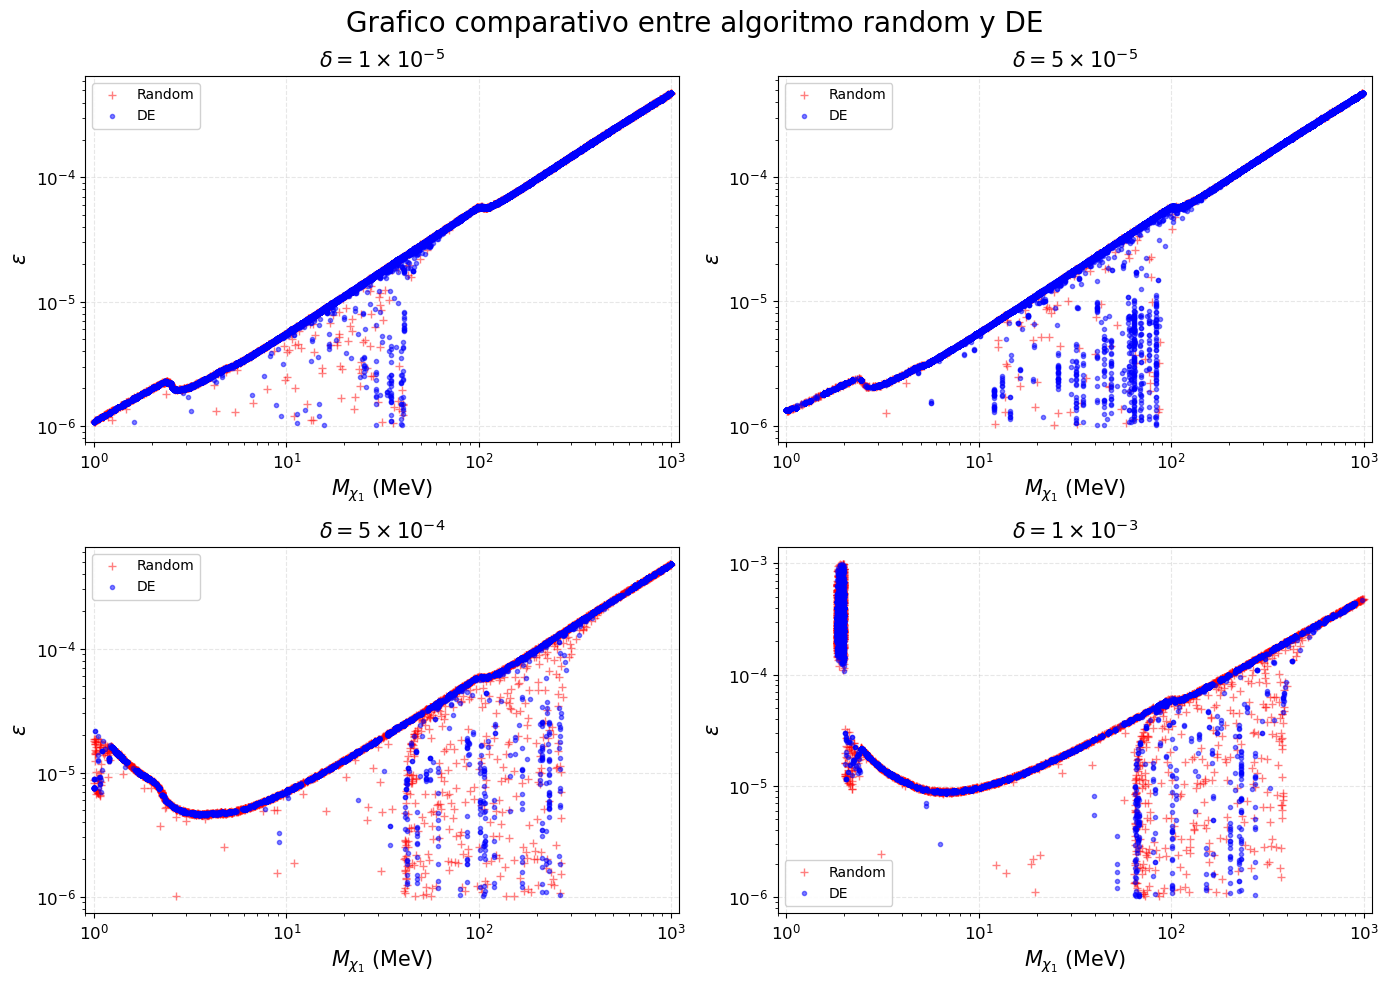

In [25]:
# Crear la figura con 4 subplots (2x2)
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

fig.suptitle('Grafico comparativo entre algoritmo random y DE',size=20, y=0.98)
# Subplot 1: δ = 1×10⁻⁵
axs[0, 0].set_title(r'$\delta = 1\times 10^{-5}$',size=15)
axs[0, 0].plot(df_omega_0p01.column('Mx1'), df_omega_0p01.column('epsilon'), '+', 
               color='red', alpha=0.5, label=r'Random')
axs[0, 0].plot(df_omega_0p01_de.column('Mx1'), df_omega_0p01_de.column('epsilon'), '.', 
               color='blue', alpha=0.5, label=r'DE')
axs[0, 0].set_xscale('log')
axs[0, 0].set_yscale('log')
axs[0, 0].set_ylabel(r'$\epsilon$', size=15)
axs[0, 0].set_xlabel(r'$M_{\chi_{1}}$ (MeV)', size=15)
axs[0, 0].grid(True, linestyle='--', alpha=0.3)
axs[0, 0].tick_params(axis='both', which='major', labelsize=12)
axs[0, 0].legend(fontsize=10, framealpha=0.9, loc='best')
axs[0, 0].set_xlim(0.9, 1e3+100)  # Límite corregido para este subplot

# Subplot 2: δ = 5×10⁻⁵
axs[0, 1].set_title(r'$\delta = 5\times 10^{-5}$',size=15)
axs[0, 1].plot(df_omega_0p05.column('Mx1'), df_omega_0p05.column('epsilon'), '+', 
               color='red', alpha=0.5, label=r'Random')
axs[0, 1].plot(df_omega_0p05_de.column('Mx1'), df_omega_0p05_de.column('epsilon'), '.', 
               color='blue', alpha=0.5, label=r'DE')
axs[0, 1].set_xscale('log')
axs[0, 1].set_yscale('log')
axs[0, 1].set_ylabel(r'$\epsilon$', size=15)
axs[0, 1].set_xlabel(r'$M_{\chi_1}$ (MeV)', size=15)
axs[0, 1].grid(True, linestyle='--', alpha=0.3)
axs[0, 1].tick_params(axis='both', which='major', labelsize=12)
axs[0, 1].legend(fontsize=10, framealpha=0.9, loc='best')
axs[0, 1].set_xlim(0.9, 1e3+100)  # Límite corregido para este subplot

# Subplot 3: δ = 5×10⁻⁴
axs[1, 0].set_title(r'$\delta = 5\times 10^{-4}$',size=15)
axs[1, 0].plot(df_omega_0p5.column('Mx1'), df_omega_0p5.column('epsilon'), '+', 
               color='red', alpha=0.5, label=r'Random')
axs[1, 0].plot(df_omega_0p5_de.column('Mx1'), df_omega_0p5_de.column('epsilon'), '.', 
               color='blue', alpha=0.5, label=r'DE')
axs[1, 0].set_xscale('log')
axs[1, 0].set_yscale('log')
axs[1, 0].set_ylabel(r'$\epsilon$', size=15)
axs[1, 0].set_xlabel(r'$M_{\chi_1}$ (MeV)', size=15)
axs[1, 0].grid(True, linestyle='--', alpha=0.3)
axs[1, 0].tick_params(axis='both', which='major', labelsize=12)
axs[1, 0].legend(fontsize=10, framealpha=0.9, loc='best')
axs[1, 0].set_xlim(0.9, 1e3+100) # Límite corregido para este subplot

# Subplot 4: δ = 1×10⁻³
axs[1, 1].set_title(r'$\delta = 1\times 10^{-3}$',size=15)
axs[1, 1].plot(df_omega_1.column('Mx1'), df_omega_1.column('epsilon'), '+', 
              color='red', alpha=0.5, label=r'Random')
axs[1, 1].plot(df_omega_1_de.column('Mx1'), df_omega_1_de.column('epsilon'), '.', 
              color='blue', alpha=0.5, label=r'DE')
axs[1, 1].set_xscale('log')
axs[1, 1].set_yscale('log')
axs[1, 1].set_ylabel(r'$\epsilon$', size=15)
axs[1, 1].set_xlabel(r'$M_{\chi_1}$ (MeV)', size=15)
axs[1, 1].grid(True, linestyle='--', alpha=0.3)
axs[1, 1].tick_params(axis='both', which='major', labelsize=12)
axs[1, 1].legend(fontsize=10, framealpha=0.9, loc='best')
axs[1, 1].set_xlim(0.9, 1e3+100)  # Límite corregido para este subplot

# Ajustar el espaciado entre subplots
plt.tight_layout()
plt.savefig('grafico_comparativo.jpg', dpi=300)
plt.show()

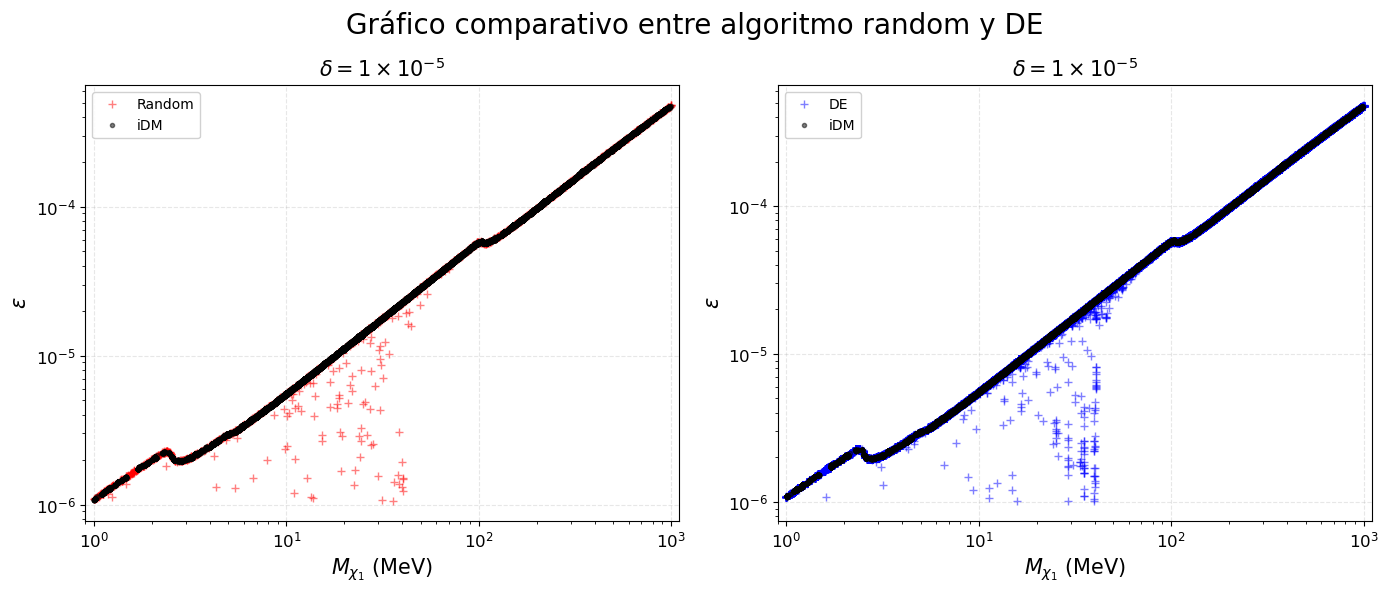

In [26]:
# Crear la figura con 2 subplots en una fila (1x2)
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

fig.suptitle('Gráfico comparativo entre algoritmo random y DE', size=20, y=0.98)

# Subplot 1: δ = 1×10⁻⁵
axs[0].set_title(r'$\delta = 1\times 10^{-5}$', size=15)
axs[0].plot(df_omega_0p01.column('Mx1'), df_omega_0p01.column('epsilon'), '+', 
           color='red', alpha=0.5, label=r'Random')
axs[0].plot(df_omega_0p01_idm.column('Mx1'), df_omega_0p01_idm.column('epsilon'), '.', 
           color='black', alpha=0.5, label=r'iDM')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_ylabel(r'$\epsilon$', size=15)
axs[0].set_xlabel(r'$M_{\chi_{1}}$ (MeV)', size=15)
axs[0].grid(True, linestyle='--', alpha=0.3)
axs[0].tick_params(axis='both', which='major', labelsize=12)
axs[0].legend(fontsize=10, framealpha=0.9, loc='best')
axs[0].set_xlim(0.9, 1e3+100)

# Subplot 2: δ = 5×10⁻⁵
axs[1].set_title(r'$\delta = 1\times 10^{-5}$', size=15)
axs[1].plot(df_omega_0p01_de.column('Mx1'), df_omega_0p01_de.column('epsilon'), '+', 
           color='blue', alpha=0.5, label=r'DE')
axs[1].plot(df_omega_0p01_idm.column('Mx1'), df_omega_0p01_idm.column('epsilon'), '.', 
           color='black', alpha=0.5, label=r'iDM')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_ylabel(r'$\epsilon$', size=15)
axs[1].set_xlabel(r'$M_{\chi_1}$ (MeV)', size=15)
axs[1].grid(True, linestyle='--', alpha=0.3)
axs[1].tick_params(axis='both', which='major', labelsize=12)
axs[1].legend(fontsize=10, framealpha=0.9, loc='best')
axs[1].set_xlim(0.9, 1e3+100)

# Ajustar el espaciado entre subplots
plt.tight_layout()
plt.savefig('grafico_delta0p01.jpg',dpi=300)
plt.show()

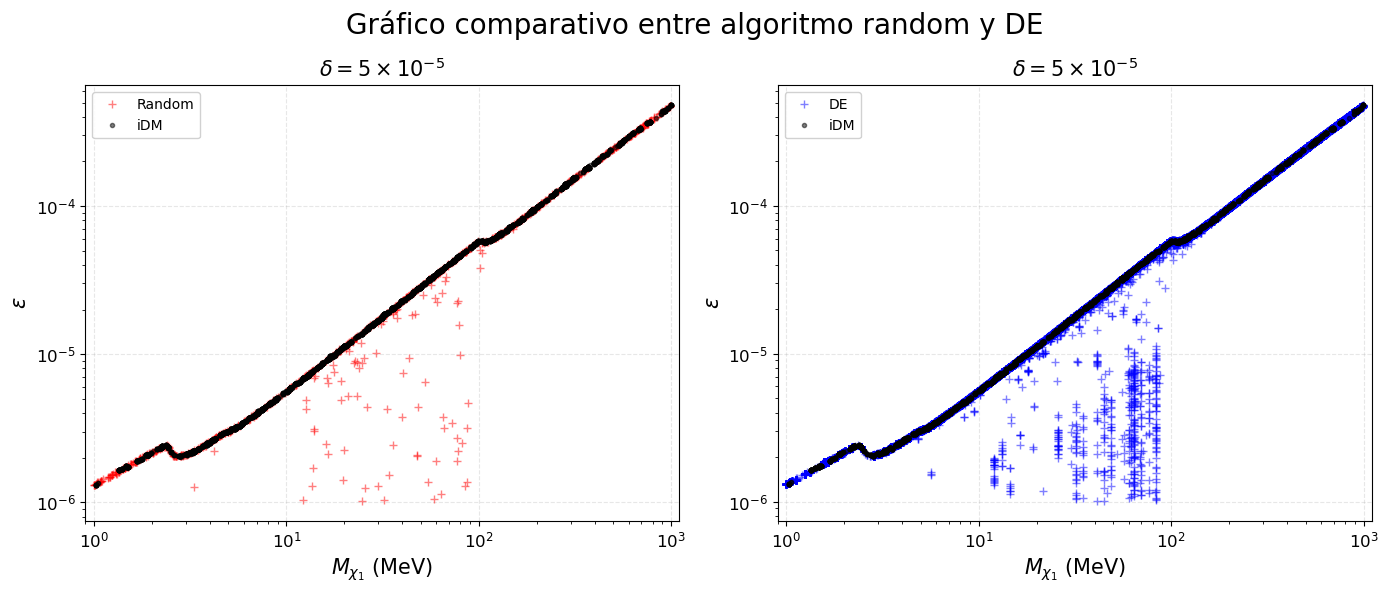

In [27]:
# Crear la figura con 2 subplots en una fila (1x2)
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

fig.suptitle('Gráfico comparativo entre algoritmo random y DE', size=20, y=0.98)

# Subplot 1: δ = 1×10⁻⁵
axs[0].set_title(r'$\delta = 5\times 10^{-5}$', size=15)
axs[0].plot(df_omega_0p05.column('Mx1'), df_omega_0p05.column('epsilon'), '+', 
           color='red', alpha=0.5, label=r'Random')
axs[0].plot(df_omega_0p05_idm.column('Mx1'), df_omega_0p05_idm.column('epsilon'), '.', 
           color='black', alpha=0.5, label=r'iDM')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_ylabel(r'$\epsilon$', size=15)
axs[0].set_xlabel(r'$M_{\chi_{1}}$ (MeV)', size=15)
axs[0].grid(True, linestyle='--', alpha=0.3)
axs[0].tick_params(axis='both', which='major', labelsize=12)
axs[0].legend(fontsize=10, framealpha=0.9, loc='best')
axs[0].set_xlim(0.9, 1e3+100)

# Subplot 2: δ = 5×10⁻⁵
axs[1].set_title(r'$\delta = 5\times 10^{-5}$', size=15)
axs[1].plot(df_omega_0p05_de.column('Mx1'), df_omega_0p05_de.column('epsilon'), '+', 
           color='blue', alpha=0.5, label=r'DE')
axs[1].plot(df_omega_0p05_idm.column('Mx1'), df_omega_0p05_idm.column('epsilon'), '.', 
           color='black', alpha=0.5, label=r'iDM')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_ylabel(r'$\epsilon$', size=15)
axs[1].set_xlabel(r'$M_{\chi_1}$ (MeV)', size=15)
axs[1].grid(True, linestyle='--', alpha=0.3)
axs[1].tick_params(axis='both', which='major', labelsize=12)
axs[1].legend(fontsize=10, framealpha=0.9, loc='best')
axs[1].set_xlim(0.9, 1e3+100)

# Ajustar el espaciado entre subplots
plt.tight_layout()
plt.savefig('grafico_delta0p05.jpg',dpi=300)
plt.show()

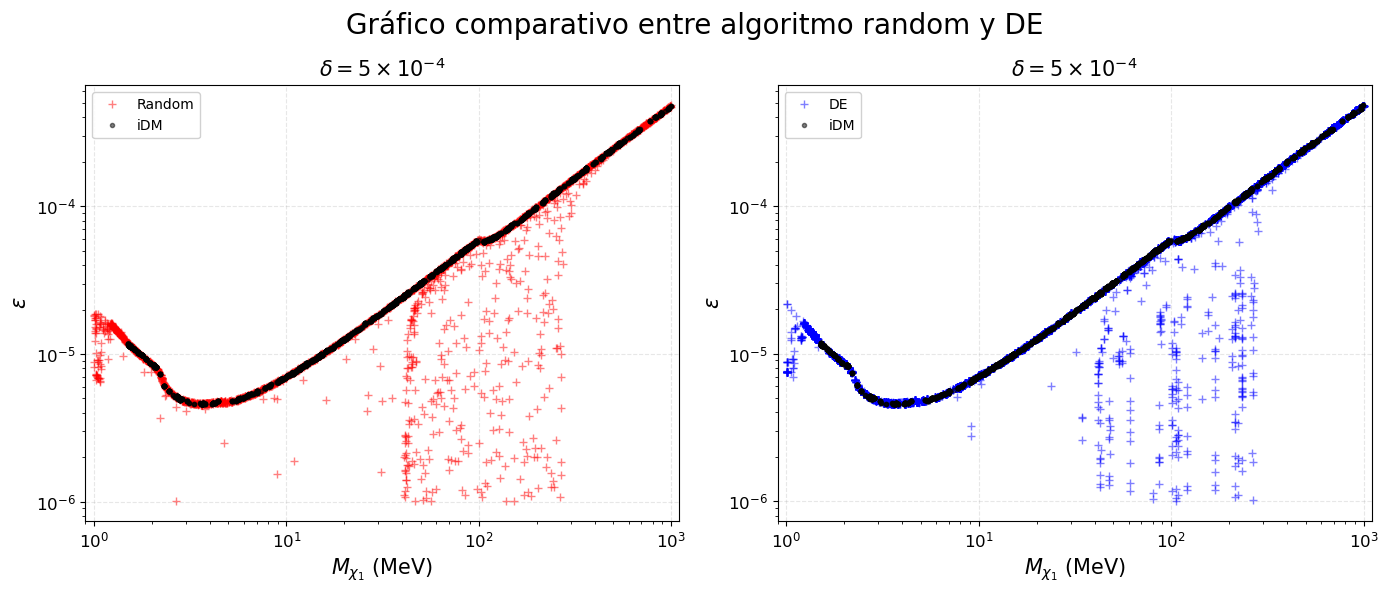

In [28]:
# Crear la figura con 2 subplots en una fila (1x2)
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

fig.suptitle('Gráfico comparativo entre algoritmo random y DE', size=20, y=0.98)

# Subplot 1: δ = 1×10⁻⁵
axs[0].set_title(r'$\delta = 5\times 10^{-4}$', size=15)
axs[0].plot(df_omega_0p5.column('Mx1'), df_omega_0p5.column('epsilon'), '+', 
           color='red', alpha=0.5, label=r'Random')
axs[0].plot(df_omega_0p5_idm.column('Mx1'), df_omega_0p5_idm.column('epsilon'), '.', 
           color='black', alpha=0.5, label=r'iDM')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_ylabel(r'$\epsilon$', size=15)
axs[0].set_xlabel(r'$M_{\chi_{1}}$ (MeV)', size=15)
axs[0].grid(True, linestyle='--', alpha=0.3)
axs[0].tick_params(axis='both', which='major', labelsize=12)
axs[0].legend(fontsize=10, framealpha=0.9, loc='best')
axs[0].set_xlim(0.9, 1e3+100)

# Subplot 2: δ = 5×10⁻⁵
axs[1].set_title(r'$\delta = 5\times 10^{-4}$', size=15)
axs[1].plot(df_omega_0p5_de.column('Mx1'), df_omega_0p5_de.column('epsilon'), '+', 
           color='blue', alpha=0.5, label=r'DE')
axs[1].plot(df_omega_0p5_idm.column('Mx1'), df_omega_0p5_idm.column('epsilon'), '.', 
           color='black', alpha=0.5, label=r'iDM')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_ylabel(r'$\epsilon$', size=15)
axs[1].set_xlabel(r'$M_{\chi_1}$ (MeV)', size=15)
axs[1].grid(True, linestyle='--', alpha=0.3)
axs[1].tick_params(axis='both', which='major', labelsize=12)
axs[1].legend(fontsize=10, framealpha=0.9, loc='best')
axs[1].set_xlim(0.9, 1e3+100)

# Ajustar el espaciado entre subplots
plt.tight_layout()
plt.savefig('grafico_delta0p5.jpg',dpi=300)
plt.show()

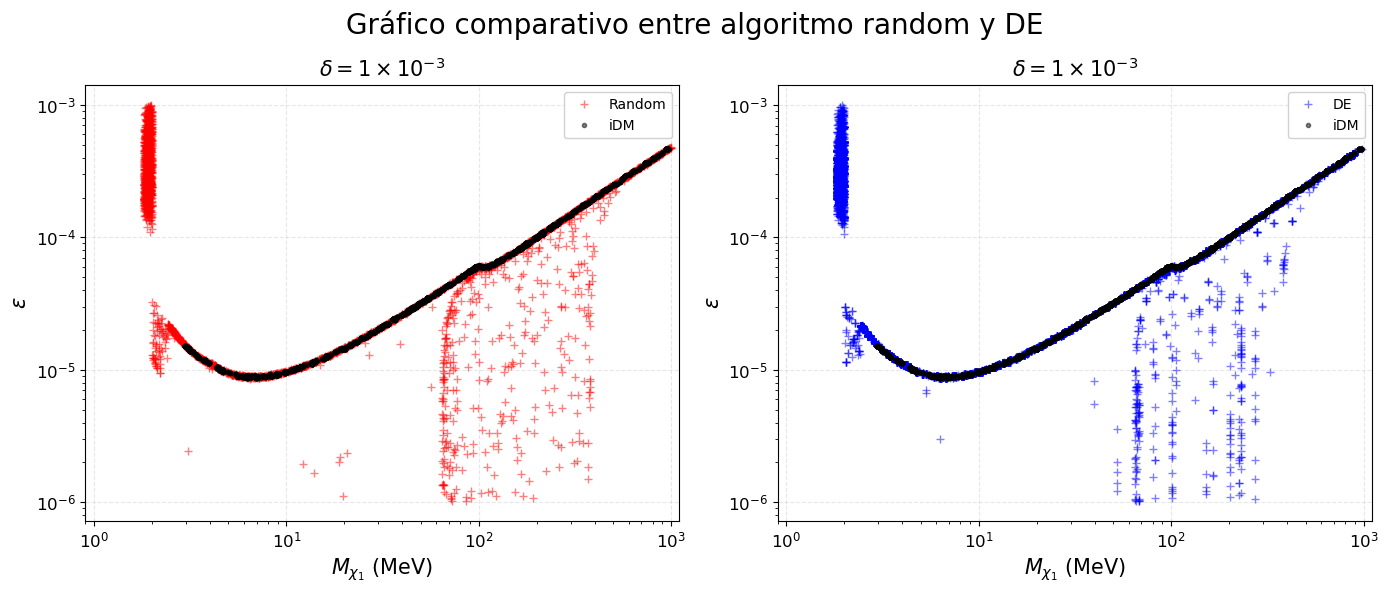

In [29]:
# Crear la figura con 2 subplots en una fila (1x2)
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

fig.suptitle('Gráfico comparativo entre algoritmo random y DE', size=20, y=0.98)

# Subplot 1: δ = 1×10⁻⁵
axs[0].set_title(r'$\delta = 1\times 10^{-3}$', size=15)
axs[0].plot(df_omega_1.column('Mx1'), df_omega_1.column('epsilon'), '+', 
           color='red', alpha=0.5, label=r'Random')
axs[0].plot(df_omega_1_idm.column('Mx1'), df_omega_1_idm.column('epsilon'), '.', 
           color='black', alpha=0.5, label=r'iDM')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_ylabel(r'$\epsilon$', size=15)
axs[0].set_xlabel(r'$M_{\chi_{1}}$ (MeV)', size=15)
axs[0].grid(True, linestyle='--', alpha=0.3)
axs[0].tick_params(axis='both', which='major', labelsize=12)
axs[0].legend(fontsize=10, framealpha=0.9, loc='best')
axs[0].set_xlim(0.9, 1e3+100)

# Subplot 2: δ = 5×10⁻⁵
axs[1].set_title(r'$\delta = 1\times 10^{-3}$', size=15)
axs[1].plot(df_omega_1_de.column('Mx1'), df_omega_1_de.column('epsilon'), '+', 
           color='blue', alpha=0.5, label=r'DE')
axs[1].plot(df_omega_1_idm.column('Mx1'), df_omega_1_idm.column('epsilon'), '.', 
           color='black', alpha=0.5, label=r'iDM')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_ylabel(r'$\epsilon$', size=15)
axs[1].set_xlabel(r'$M_{\chi_1}$ (MeV)', size=15)
axs[1].grid(True, linestyle='--', alpha=0.3)
axs[1].tick_params(axis='both', which='major', labelsize=12)
axs[1].legend(fontsize=10, framealpha=0.9, loc='best')
axs[1].set_xlim(0.9, 1e3+100)

# Ajustar el espaciado entre subplots
plt.tight_layout()
plt.savefig('grafico_delta1.jpg',dpi=300)
plt.show()